In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,_agglomerative
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score
import json 

## Loading the Data

In [77]:
from utils import get_df_description

# load df
df = pd.read_csv('../datasets/df_train.csv')
print(df.shape)

# load json file
description_json = json.load(open('df_train_description.json', 'r'))
description_json_df = pd.DataFrame(description_json)

# get df_description
df_description = get_df_description(df, description_json_df)
df_description

(96095, 25)


,column,dtype,missing_values,source,description
0,customer_unique_id,object,0,df_customers,PK
1,frequency,int64,0,Calculated,number of orders
2,repeater,int64,0,Calculated,"1:repeater, 0:non-repeater"
3,fo_order_id,object,0,df_orders,FK
4,fo_customer_id,object,0,df_orders,FK (first order's customer_id)
5,fo_order_status,object,0,df_orders,
6,fo_order_purchase_timestamp,object,0,df_orders,
7,fo_order_approved_at,object,0,df_orders,
8,fo_order_delivered_carrier_date,object,0,df_orders,
9,fo_order_delivered_customer_date,object,0,df_orders,


## Create df_numeric
### Only using the numerical features in the data

In [78]:
df_numeric = df.select_dtypes(include=['number']).dropna()
df_numeric = df_numeric.drop(columns=['customer_zip_code_prefix'])
print(df_numeric.shape)
df_numeric.head()

(3456, 12)


,frequency,repeater,recency,monetary,fo_payment_value,fo_is_daytime,fo_is_weekday,fo_delivery_delay_days,fo_review_score_mean,fo_voucher_payment_value,fo_voucher_used,customer_in_sao_paulo
19,1,0,114,78.42,78.42,1,1,-15.0,3.0,69.89,1,0
55,1,0,308,354.87,354.87,1,1,-6.0,3.0,293.54,1,0
73,1,0,482,109.78,109.78,1,1,-17.0,5.0,31.73,1,0
165,1,0,113,79.51,79.51,1,1,-21.0,5.0,79.51,1,0
232,1,0,289,66.91,66.91,1,0,-20.0,4.0,43.92,1,0


## Linkage
### Using four different linkage methods(ward, complete, average, single)
### Using three different metrics (euclidean, cosine, cityblock/manhattan, correlation)
#### The method ward can only be used with euclidean distance metric
### The dendograms are printed for each linkage method and metric

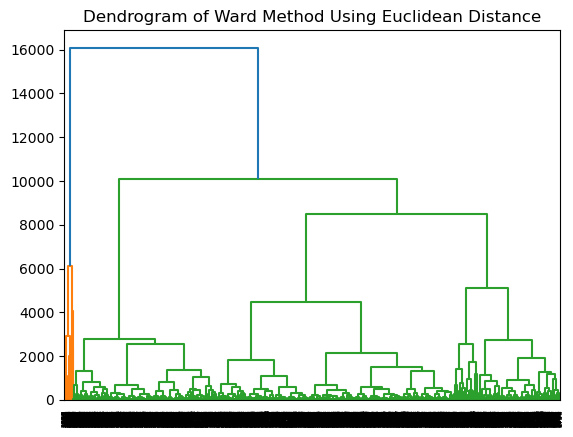

In [79]:
linkage_data_ward = linkage(df_numeric, method='ward', metric='euclidean')
dendrogram(linkage_data_ward)
plt.title('Dendrogram of Ward Method Using Euclidean Distance')
plt.show()

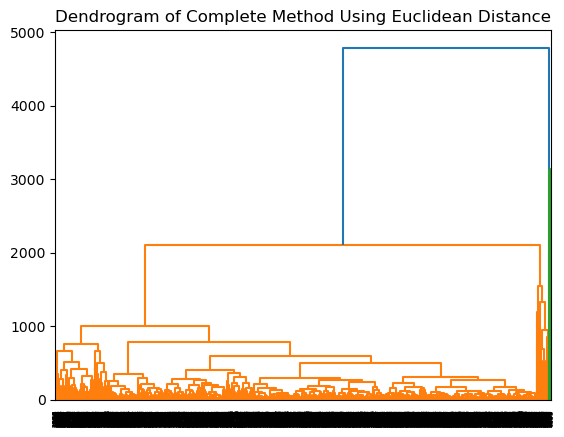

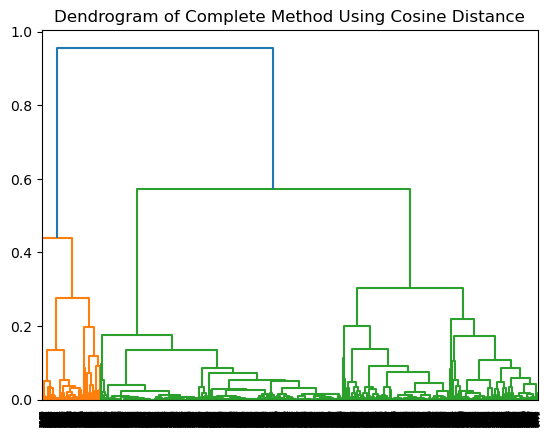

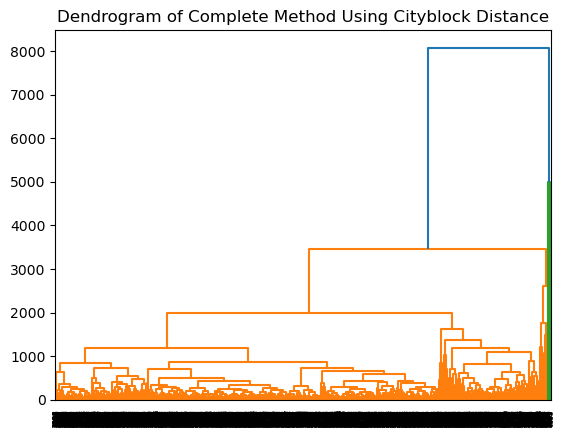

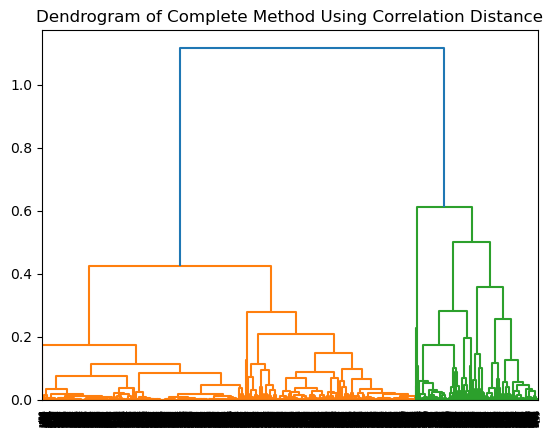

In [34]:
linkage_data_complete_euclidean = linkage(df_numeric, method='complete', metric='euclidean')
dendrogram(linkage_data_complete_euclidean)
plt.title('Dendrogram of Complete Method Using Euclidean Distance')
plt.show()
linkage_data_complete_cosine = linkage(df_numeric, method='complete', metric='cosine')
dendrogram(linkage_data_complete_cosine)
plt.title('Dendrogram of Complete Method Using Cosine Distance')
plt.show()
linkage_data_complete_cityblock = linkage(df_numeric, method='complete', metric='cityblock')
dendrogram(linkage_data_complete_cityblock)
plt.title('Dendrogram of Complete Method Using Cityblock Distance')
plt.show()
linkage_data_complete_correlation = linkage(df_numeric, method='complete', metric='correlation')
dendrogram(linkage_data_complete_correlation)
plt.title('Dendrogram of Complete Method Using Correlation Distance')
plt.show()


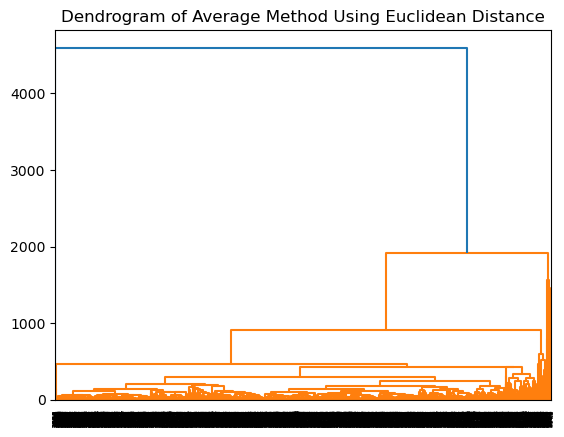

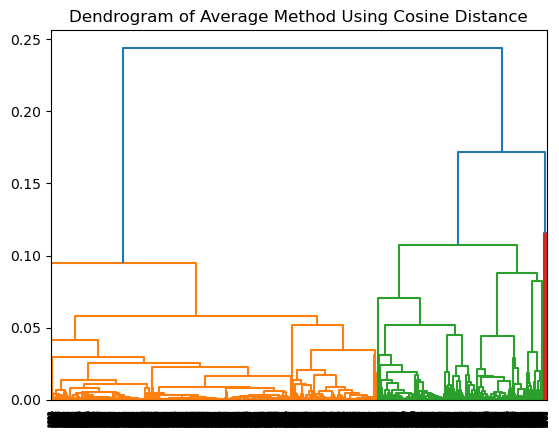

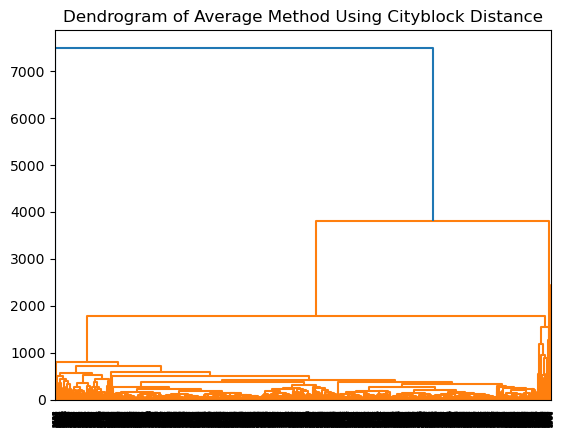

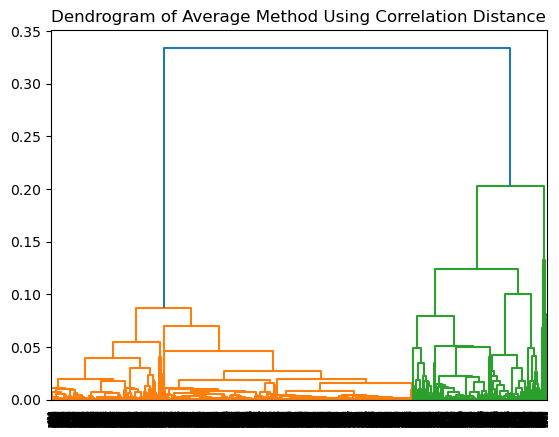

In [38]:
linkage_data_average_euclidean = linkage(df_numeric, method='average', metric='euclidean')
dendrogram(linkage_data_average_euclidean)
plt.title('Dendrogram of Average Method Using Euclidean Distance')
plt.show()
linkage_data_average_cosine = linkage(df_numeric, method='average', metric='cosine')
dendrogram(linkage_data_average_cosine)
plt.title('Dendrogram of Average Method Using Cosine Distance')
plt.show()
linkage_data_average_cityblock = linkage(df_numeric, method='average', metric='cityblock')
dendrogram(linkage_data_average_cityblock)
plt.title('Dendrogram of Average Method Using Cityblock Distance')
plt.show()
linkage_data_average_correlation = linkage(df_numeric, method='average', metric='correlation')
dendrogram(linkage_data_average_correlation)
plt.title('Dendrogram of Average Method Using Correlation Distance')
plt.show()

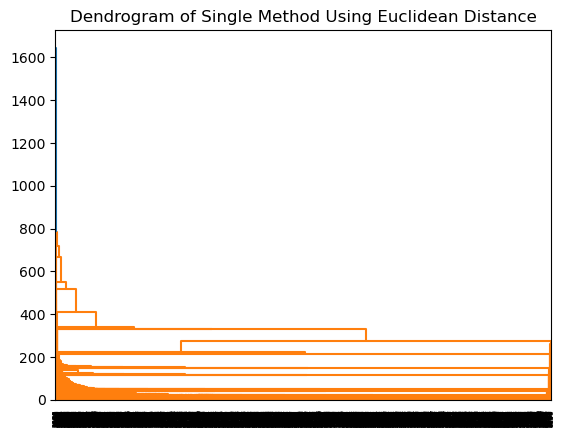

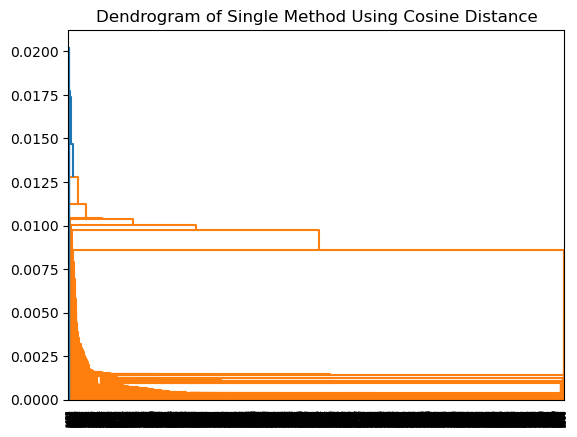

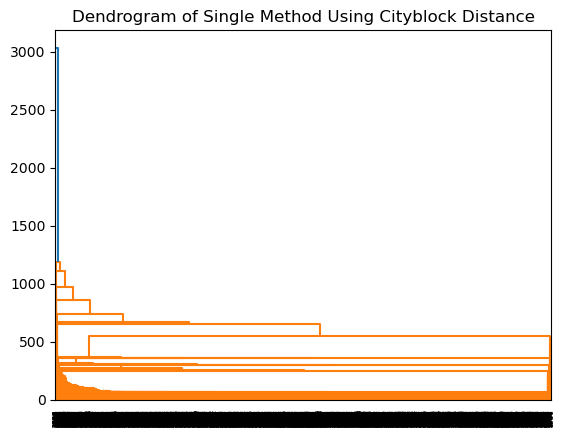

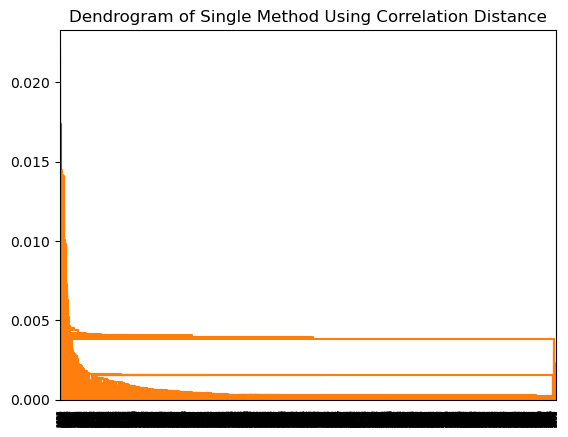

In [37]:
linkage_data_single_euclidean = linkage(df_numeric, method='single', metric='euclidean')
dendrogram(linkage_data_single_euclidean)
plt.title('Dendrogram of Single Method Using Euclidean Distance')
plt.show()
linkage_data_single_cosine = linkage(df_numeric, method='single', metric='cosine')
dendrogram(linkage_data_single_cosine)
plt.title('Dendrogram of Single Method Using Cosine Distance')
plt.show()
linkage_data_single_cityblock = linkage(df_numeric, method='single', metric='cityblock')
dendrogram(linkage_data_single_cityblock)
plt.title('Dendrogram of Single Method Using Cityblock Distance')
plt.show()
linkage_data_single_correlation = linkage(df_numeric, method='single', metric='correlation')
dendrogram(linkage_data_single_correlation)
plt.title('Dendrogram of Single Method Using Correlation Distance')
plt.show()

## Perform Agglomerative Clustering and find Silhouette Score and Davies-Bouldin Index
### Find the optimal number of clusters
### Use agglomerative clustering with different metrics and linkage and find silhouette score and Davies-Bouldin index

In [75]:
cluster_ward = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=400)
cluster_ward.fit_predict(df_numeric)
print(f"Number of clusters for ward using euclidean = {1+np.amax(cluster_ward.labels_)}")

evaluation_metrics = {}
clustering = AgglomerativeClustering(n_clusters=89, metric='euclidean',linkage='ward', distance_threshold=None).fit(df_numeric)
labels = clustering.labels_
silhouette = silhouette_score(df_numeric, labels)
davies_bouldin = davies_bouldin_score(df_numeric, labels)
evaluation_metrics['ward'] = {'silhouette_score': silhouette, 'davies_bouldin_score': davies_bouldin}
print(f"Silhouette score for ward using euclidean: {silhouette}")
print(f"Davies-Bouldin index for ward using euclidean: {davies_bouldin}")

Number of clusters for ward using euclidean = 89
Silhouette score for ward using euclidean: 0.21695106505018788
Davies-Bouldin index for ward using euclidean: 0.9379609570549142


In [72]:
cluster_complete_euclidean = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='complete', compute_full_tree=True, distance_threshold=400)
cluster_complete_euclidean.fit_predict(df_numeric)
optiomal_cluster_complete_euclidean = 1+np.amax(cluster_complete_euclidean.labels_)
print(f"Number of clusters for complete using euclidean = {optiomal_cluster_complete_euclidean}")

if optiomal_cluster_complete_euclidean > 1:
    clustering_complete_euclidean = AgglomerativeClustering(n_clusters= optiomal_cluster_complete_euclidean, metric='euclidean',linkage='complete', distance_threshold=None).fit(df_numeric)
    labels_complete_euclidean = clustering_complete_euclidean.labels_
    silhouette = silhouette_score(df_numeric, labels_complete_euclidean)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_complete_euclidean)
    print(f"Silhouette score for complete using euclidean: {silhouette}")
    print(f"Davies-Bouldin index for complete using euclidean: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for complete using euclidean: 'N/A'")
    print(f"Davies-Bouldin index for complete using euclidean: 'N/A'")
    print()


cluster_complete_cosine = AgglomerativeClustering(n_clusters=None, metric='cosine', linkage='complete', compute_full_tree=True, distance_threshold=400)
cluster_complete_cosine.fit_predict(df_numeric)
optimal_cluster_complete_cosine = 1+np.amax(cluster_complete_cosine.labels_)
print(f"Number of clusters for complete using cosine = {optimal_cluster_complete_cosine}")

if optimal_cluster_complete_cosine > 1:
    clustering_complete_cosine = AgglomerativeClustering(n_clusters= optimal_cluster_complete_cosine, metric='cosine',linkage='complete', distance_threshold=None).fit(df_numeric)
    labels_complete_cosine = clustering_complete_cosine.labels_
    silhouette = silhouette_score(df_numeric, labels_complete_cosine)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_complete_cosine)
    print(f"Silhouette score for complete using cosine: {silhouette}")
    print(f"Davies-Bouldin index for complete using cosine: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for complete using cosine: 'N/A'")
    print(f"Davies-Bouldin index for complete using cosine: 'N/A'")
    print()


cluster_complete_cityblock = AgglomerativeClustering(n_clusters=None, metric='cityblock', linkage='complete', compute_full_tree=True, distance_threshold=400)
cluster_complete_cityblock.fit_predict(df_numeric)
optimal_cluster_complete_cityblock = 1+np.amax(cluster_complete_cityblock.labels_)
print(f"Number of clusters for complete using cityblock = {optimal_cluster_complete_cityblock}")

if optimal_cluster_complete_cityblock > 1:
    clustering_complete_cityblock = AgglomerativeClustering(n_clusters= optimal_cluster_complete_cityblock, metric='cityblock',linkage='complete', distance_threshold=None).fit(df_numeric)
    labels_complete_cityblock = clustering_complete_cityblock.labels_
    silhouette = silhouette_score(df_numeric, labels_complete_cityblock)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_complete_cityblock)
    print(f"Silhouette score for complete using cityblock: {silhouette}")
    print(f"Davies-Bouldin index for complete using cityblock: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for complete using cityblock: 'N/A'")
    print(f"Davies-Bouldin index for complete using cityblock: 'N/A'")
    print()


cluster_complete_correlation = AgglomerativeClustering(n_clusters=None, metric='correlation', linkage='complete', compute_full_tree=True, distance_threshold=400)
cluster_complete_correlation.fit_predict(df_numeric)
optimal_cluster_complete_correlation = 1+np.amax(cluster_complete_correlation.labels_)
print(f"Number of clusters for complete using correlation = {optimal_cluster_complete_correlation}")

if optimal_cluster_complete_correlation > 1:
    clustering_complete_correlation = AgglomerativeClustering(n_clusters= optimal_cluster_complete_correlation, metric='euclidean',linkage='complete', distance_threshold=None).fit(df_numeric)
    labels_complete_correlation = clustering_complete_correlation.labels_
    silhouette = silhouette_score(df_numeric, labels_complete_correlation)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_complete_correlation)
    print(f"Silhouette score for complete using correlation: {silhouette}")
    print(f"Davies-Bouldin index for complete using correlation: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for complete using correlation: 'N/A'")
    print(f"Davies-Bouldin index for complete using correlation: 'N/A'")
    print()

Number of clusters for complete using euclidean = 38
Silhouette score for complete using euclidean: 0.2951606501152796
Davies-Bouldin index for complete using euclidean: 0.7572014943448224

Number of clusters for complete using cosine = 1
Silhouette score for complete using cosine: 'N/A'
Davies-Bouldin index for complete using cosine: 'N/A'

Number of clusters for complete using cityblock = 90
Silhouette score for complete using cityblock: 0.19496669461433744
Davies-Bouldin index for complete using cityblock: 0.8753735767211841

Number of clusters for complete using correlation = 1
Silhouette score for complete using correlation: 'N/A'
Davies-Bouldin index for complete using correlation: 'N/A'



In [73]:
cluster_average_euclidean = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='average', compute_full_tree=True, distance_threshold=400)
cluster_average_euclidean.fit_predict(df_numeric)
optiomal_cluster_average_euclidean = 1+np.amax(cluster_average_euclidean.labels_)
print(f"Number of clusters for average using euclidean = {optiomal_cluster_average_euclidean}")

if optiomal_cluster_average_euclidean > 1:
    clustering_average_euclidean = AgglomerativeClustering(n_clusters= optiomal_cluster_average_euclidean, metric='euclidean',linkage='average', distance_threshold=None).fit(df_numeric)
    labels_average_euclidean = clustering_average_euclidean.labels_
    silhouette = silhouette_score(df_numeric, labels_average_euclidean)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_average_euclidean)
    print(f"Silhouette score for average using euclidean: {silhouette}")
    print(f"Davies-Bouldin index for average using euclidean: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for average using euclidean: 'N/A'")
    print(f"Davies-Bouldin index for average using euclidean: 'N/A'")
    print()


cluster_average_cosine = AgglomerativeClustering(n_clusters=None, metric='cosine', linkage='average', compute_full_tree=True, distance_threshold=400)
cluster_average_cosine.fit_predict(df_numeric)
optimal_cluster_average_cosine = 1+np.amax(cluster_average_cosine.labels_)
print(f"Number of clusters for average using cosine = {optimal_cluster_average_cosine}")

if optimal_cluster_average_cosine > 1:
    clustering_average_cosine = AgglomerativeClustering(n_clusters= optimal_cluster_average_cosine, metric='cosine',linkage='average', distance_threshold=None).fit(df_numeric)
    labels_average_cosine = clustering_average_cosine.labels_
    silhouette = silhouette_score(df_numeric, labels_average_cosine)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_average_cosine)
    print(f"Silhouette score for average using cosine: {silhouette}")
    print(f"Davies-Bouldin index for average using cosine: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for average using cosine: 'N/A'")
    print(f"Davies-Bouldin index for average using cosine: 'N/A'")
    print()


cluster_average_cityblock = AgglomerativeClustering(n_clusters=None, metric='cityblock', linkage='average', compute_full_tree=True, distance_threshold=400)
cluster_average_cityblock.fit_predict(df_numeric)
optimal_cluster_average_cityblock = 1+np.amax(cluster_average_cityblock.labels_)
print(f"Number of clusters for average using cityblock = {optimal_cluster_average_cityblock}")

if optimal_cluster_average_cityblock > 1:
    clustering_average_cityblock = AgglomerativeClustering(n_clusters= optimal_cluster_average_cityblock, metric='cityblock',linkage='average', distance_threshold=None).fit(df_numeric)
    labels_average_cityblock = clustering_average_cityblock.labels_
    silhouette = silhouette_score(df_numeric, labels_average_cityblock)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_average_cityblock)
    print(f"Silhouette score for average using cityblock: {silhouette}")
    print(f"Davies-Bouldin index for average using cityblock: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for average using cityblock: 'N/A'")
    print(f"Davies-Bouldin index for average using cityblock: 'N/A'")
    print()


cluster_average_correlation = AgglomerativeClustering(n_clusters=None, metric='correlation', linkage='average', compute_full_tree=True, distance_threshold=400)
cluster_average_correlation.fit_predict(df_numeric)
optimal_cluster_average_correlation = 1+np.amax(cluster_average_correlation.labels_)
print(f"Number of clusters for average using correlation = {optimal_cluster_average_correlation}")

if optimal_cluster_average_correlation > 1:
    clustering_average_correlation = AgglomerativeClustering(n_clusters= optimal_cluster_average_correlation, metric='euclidean',linkage='average', distance_threshold=None).fit(df_numeric)
    labels_average_correlation = clustering_average_correlation.labels_
    silhouette = silhouette_score(df_numeric, labels_average_correlation)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_average_correlation)
    print(f"Silhouette score for average using correlation: {silhouette}")
    print(f"Davies-Bouldin index for average using correlation: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for average using correlation: 'N/A'")
    print(f"Davies-Bouldin index for average using correlation: 'N/A'")
    print()

Number of clusters for average using euclidean = 20
Silhouette score for average using euclidean: 0.33336469569411903
Davies-Bouldin index for average using euclidean: 0.60930213353135

Number of clusters for average using cosine = 1
Silhouette score for average using cosine: 'N/A'
Davies-Bouldin index for average using cosine: 'N/A'

Number of clusters for average using cityblock = 44
Silhouette score for average using cityblock: 0.27922032744019265
Davies-Bouldin index for average using cityblock: 0.6218474886926217

Number of clusters for average using correlation = 1
Silhouette score for average using correlation: 'N/A'
Davies-Bouldin index for average using correlation: 'N/A'



In [74]:
cluster_single_euclidean = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='single', compute_full_tree=True, distance_threshold=400)
cluster_single_euclidean.fit_predict(df_numeric)
optiomal_cluster_single_euclidean = 1+np.amax(cluster_single_euclidean.labels_)
print(f"Number of clusters for single using euclidean = {optiomal_cluster_single_euclidean}")

if optiomal_cluster_single_euclidean > 1:
    clustering_single_euclidean = AgglomerativeClustering(n_clusters= optiomal_cluster_single_euclidean, metric='euclidean',linkage='single', distance_threshold=None).fit(df_numeric)
    labels_single_euclidean = clustering_single_euclidean.labels_
    silhouette = silhouette_score(df_numeric, labels_single_euclidean)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_single_euclidean)
    print(f"Silhouette score for single using euclidean: {silhouette}")
    print(f"Davies-Bouldin index for single using euclidean: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for single using euclidean: 'N/A'")
    print(f"Davies-Bouldin index for single using euclidean: 'N/A'")
    print()


cluster_single_cosine = AgglomerativeClustering(n_clusters=None, metric='cosine', linkage='single', compute_full_tree=True, distance_threshold=400)
cluster_single_cosine.fit_predict(df_numeric)
optimal_cluster_single_cosine = 1+np.amax(cluster_single_cosine.labels_)
print(f"Number of clusters for single using cosine = {optimal_cluster_single_cosine}")

if optimal_cluster_single_cosine > 1:
    clustering_single_cosine = AgglomerativeClustering(n_clusters= optimal_cluster_single_cosine, metric='cosine',linkage='single', distance_threshold=None).fit(df_numeric)
    labels_single_cosine = clustering_single_cosine.labels_
    silhouette = silhouette_score(df_numeric, labels_single_cosine)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_single_cosine)
    print(f"Silhouette score for single using cosine: {silhouette}")
    print(f"Davies-Bouldin index for single using cosine: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for single using cosine: 'N/A'")
    print(f"Davies-Bouldin index for single using cosine: 'N/A'")
    print()


cluster_single_cityblock = AgglomerativeClustering(n_clusters=None, metric='cityblock', linkage='single', compute_full_tree=True, distance_threshold=400)
cluster_single_cityblock.fit_predict(df_numeric)
optimal_cluster_single_cityblock = 1+np.amax(cluster_single_cityblock.labels_)
print(f"Number of clusters for single using cityblock = {optimal_cluster_single_cityblock}")

if optimal_cluster_single_cityblock > 1:
    clustering_single_cityblock = AgglomerativeClustering(n_clusters= optimal_cluster_single_cityblock, metric='cityblock',linkage='single', distance_threshold=None).fit(df_numeric)
    labels_single_cityblock = clustering_single_cityblock.labels_
    silhouette = silhouette_score(df_numeric, labels_single_cityblock)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_single_cityblock)
    print(f"Silhouette score for single using cityblock: {silhouette}")
    print(f"Davies-Bouldin index for single using cityblock: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for single using cityblock: 'N/A'")
    print(f"Davies-Bouldin index for single using cityblock: 'N/A'")
    print()


cluster_single_correlation = AgglomerativeClustering(n_clusters=None, metric='correlation', linkage='single', compute_full_tree=True, distance_threshold=400)
cluster_single_correlation.fit_predict(df_numeric)
optimal_cluster_single_correlation = 1+np.amax(cluster_single_correlation.labels_)
print(f"Number of clusters for single using correlation = {optimal_cluster_single_correlation}")

if optimal_cluster_single_correlation > 1:
    clustering_single_correlation = AgglomerativeClustering(n_clusters= optimal_cluster_single_correlation, metric='euclidean',linkage='single', distance_threshold=None).fit(df_numeric)
    labels_single_correlation = clustering_single_correlation.labels_
    silhouette = silhouette_score(df_numeric, labels_single_correlation)
    davies_bouldin = davies_bouldin_score(df_numeric, labels_single_correlation)
    print(f"Silhouette score for single using correlation: {silhouette}")
    print(f"Davies-Bouldin index for single using correlation: {davies_bouldin}")
    print()
else:
    print(f"Silhouette score for single using correlation: 'N/A'")
    print(f"Davies-Bouldin index for single using correlation: 'N/A'")
    print()

Number of clusters for single using euclidean = 9
Silhouette score for single using euclidean: 0.7821543617743771
Davies-Bouldin index for single using euclidean: 0.24860526814053804

Number of clusters for single using cosine = 1
Silhouette score for single using cosine: 'N/A'
Davies-Bouldin index for single using cosine: 'N/A'

Number of clusters for single using cityblock = 18
Silhouette score for single using cityblock: 0.7837381353596263
Davies-Bouldin index for single using cityblock: 0.19734392613073373

Number of clusters for single using correlation = 1
Silhouette score for single using correlation: 'N/A'
Davies-Bouldin index for single using correlation: 'N/A'

